In [82]:
#Data analysis of a retail sales of a business
import matplotlib.pyplot as plt # for plotting
import pandas as pd # for dataframe 
import numpy as np #for array
import seaborn as sns
df=pd.read_csv("business.retailsales.csv") #To read csv file in python as a dataframe

In [25]:
df.columns

Index(['Product Type', 'Net Quantity', 'Gross Sales', 'Discounts', 'Returns',
       'Total Net Sales'],
      dtype='object')

In [5]:
df.head() #first five rows

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Art & Sculpture,34,14935.0,-594.00,-1609.0,12732.00
1,Basket,13,3744.0,-316.80,0.0,3427.20
2,Basket,12,3825.0,-201.60,-288.0,3335.40
3,Basket,17,3035.0,-63.25,0.0,2971.75
4,Art & Sculpture,47,2696.8,-44.16,0.0,2652.64


In [36]:
df.shape #is used to get total no. of rows and columns

(1767, 6)

In [6]:
df.info() # basic information about the dataframe including index,name,count,data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product Type     1767 non-null   object 
 1   Net Quantity     1775 non-null   int64  
 2   Gross Sales      1775 non-null   float64
 3   Discounts        1775 non-null   float64
 4   Returns          1775 non-null   float64
 5   Total Net Sales  1775 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 83.3+ KB


In [7]:
df.describe() #statistical description of dataframe, gives output of count,mean, std, min, max, percentage 

,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
count,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000
mean,3.712676,199.671746,-6.317623,-5.385437,187.968687
std,6.243078,464.880638,20.903517,46.654269,414.547039
min,-1.000000,0.000000,-594.000000,-1609.000000,-106.250000
25%,1.000000,48.000000,-6.000000,0.000000,44.800000
50%,2.000000,100.000000,0.000000,0.000000,96.000000
75%,4.000000,185.500000,0.000000,0.000000,184.750000
max,96.000000,14935.000000,0.000000,0.000000,12732.000000


In [8]:
df.isnull().sum() #to identify number of null values in the columns 
#df.isnull() only returns true or false on whether value is null or not

Product Type       8
Net Quantity       0
Gross Sales        0
Discounts          0
Returns            0
Total Net Sales    0
dtype: int64

In [9]:
df = df.dropna() #drop rows with missing values
#df = df.fillna(value) can be used to fill same value in place of missing value 

In [46]:
df.duplicated().sum() #to find no. of duplicates

0

In [47]:
df.drop_duplicates(inplace= True) #to drop duplicated values

In [48]:
df['Total Net Sales'].idxmax() # idxmax is used to know the index of the max value to the column

0

In [49]:
#max value of net sales
df.iloc[0]  #iloc is used to retrieve values using their index

Product Type       Art & Sculpture
Net Quantity                    34
Gross Sales                14935.0
Discounts                   -594.0
Returns                    -1609.0
Total Net Sales            12732.0
Name: 0, dtype: object

In [50]:
df['Total Net Sales'].min() #minimum Net sales value without iloc

-106.25

In [86]:
C=df.iloc[:,1:5].corr().sort_values(by="Gross Sales", ascending=False) # To find how columns are correlated 1 means positive correlation while -1 means negative
C

,Net Quantity,Gross Sales,Discounts,Returns
Gross Sales,0.467464,1.000000,-0.852152,-0.725444
Net Quantity,1.000000,0.467464,-0.318734,-0.132924
Returns,-0.132924,-0.725444,0.590271,1.000000
Discounts,-0.318734,-0.852152,1.000000,0.590271


<Axes: >

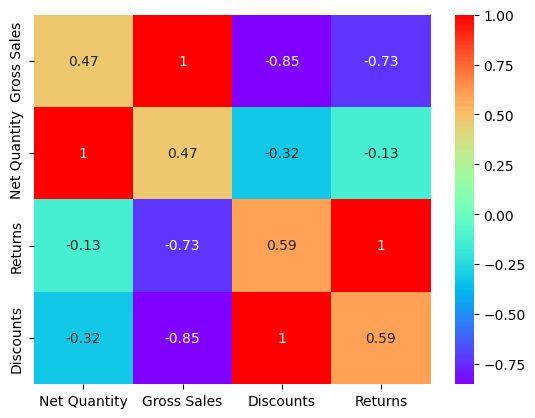

In [87]:
sns.heatmap(C, annot= True, cmap='rainbow') #seaborn is used to create a heatmap representing correlation between columns

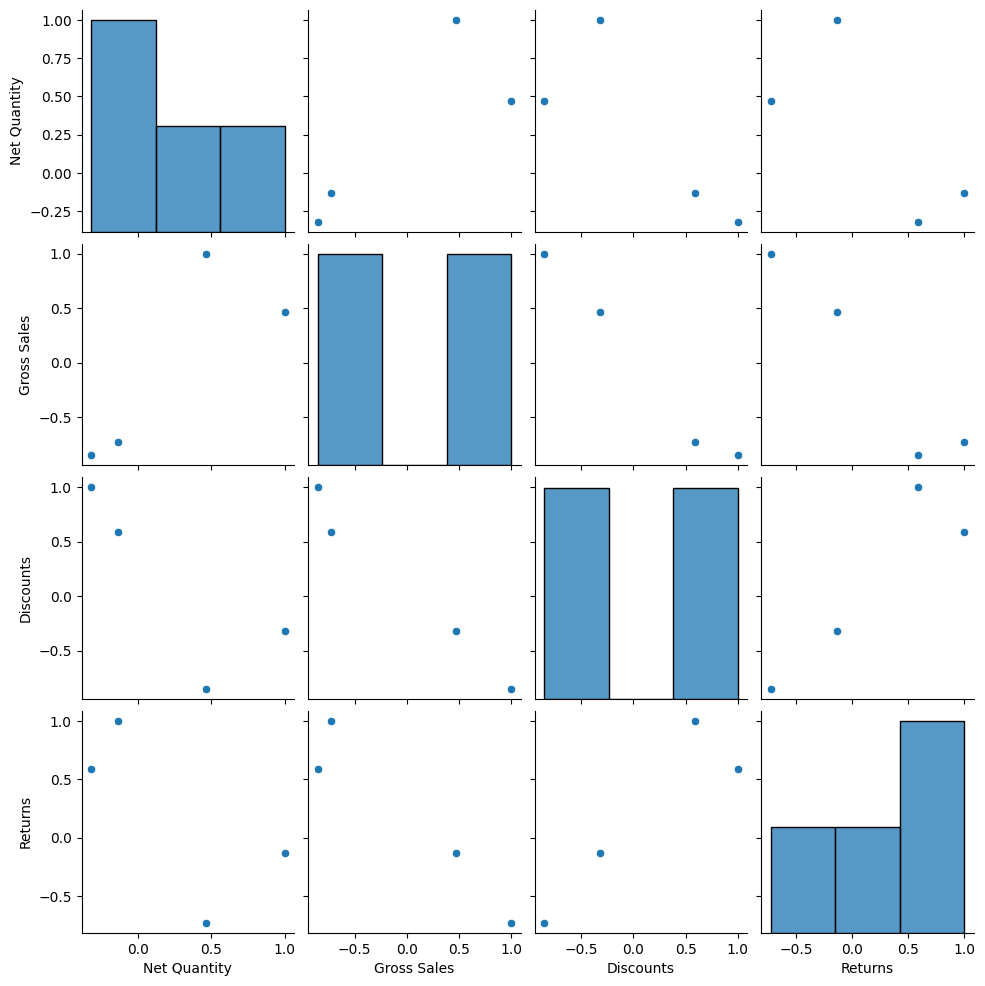

In [88]:
sns.pairplot(C) #pairplot another way to represent correlation

In [102]:
colorforx=['deeppink','darkmagenta','darkorchid','palevioletred','rosybrown'] #creating a list of colors for x, for the for loop
colorchanger=0 #assign color changer with value of 0

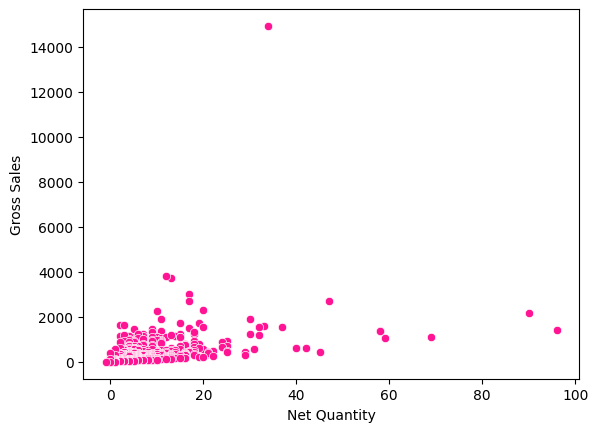

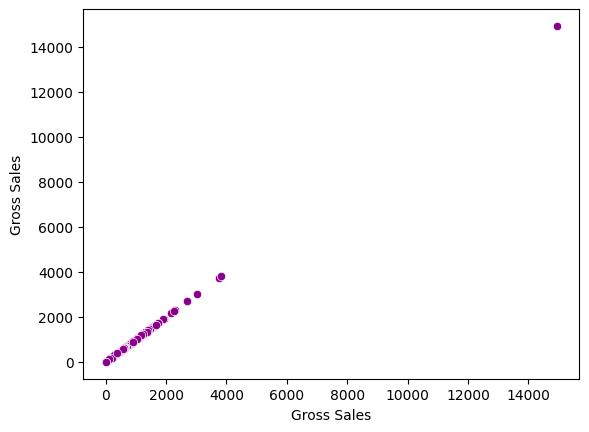

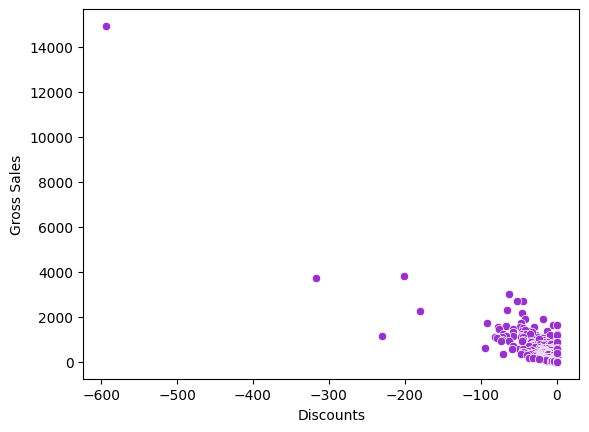

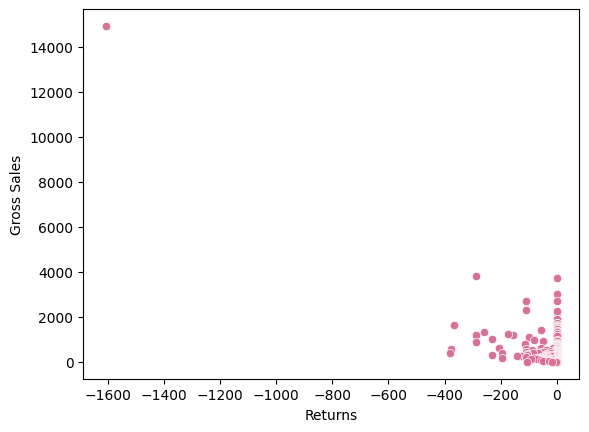

In [103]:
for i in df.columns[1:-1]: #creating a for loop to create scatter plot of columns in relation with gross sales and changing colors
    sns.scatterplot(data=df,x=i,y="Gross Sales", color=colorforx[colorchanger])
    plt.show()      
    colorchanger +=1 #value of colorchanger increases which gets different index value from color list each time

In [51]:
df['Product Type'].unique() #to get distinct values from a column 

array(['Art & Sculpture', 'Basket', 'Christmas', 'Home Decor',
       'Recycled Art', 'Jewelry', 'Skin Care', 'Kitchen', 'Textiles',
       'Accessories', 'Fair Trade Gifts', 'One-of-a-Kind', 'Soapstone',
       'Music', 'Furniture', 'Kids', 'Easter', 'Gift Baskets'],
      dtype=object)

In [52]:
df.groupby('Product Type')['Gross Sales'].sum()
#df.groupby('Product Type'): This groups the DataFrame df by the 'Product Type' column, creating a group object.
#['Gross Sales']: This selects the 'Gross Sales' column from each group.
#.sum(): This computes the sum of the 'Gross Sales' values within each group.

Product Type
Accessories           2946.40
Art & Sculpture      84924.60
Basket              110256.50
Christmas            15296.00
Easter                  38.00
Fair Trade Gifts      2234.00
Furniture             2034.00
Gift Baskets            19.50
Home Decor           25931.55
Jewelry              27810.00
Kids                  3315.50
Kitchen              14455.00
Music                 2561.50
One-of-a-Kind         1520.00
Recycled Art          3566.80
Skin Care             2591.00
Soapstone             4579.50
Textiles              1813.00
Name: Gross Sales, dtype: float64

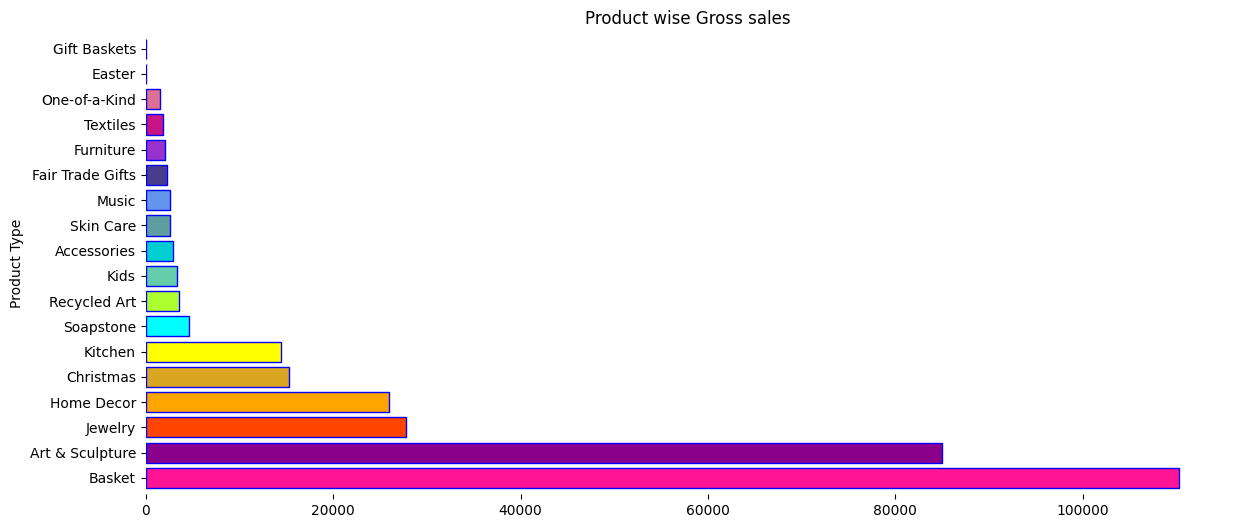

In [65]:
# Create an axes object
ax=plt.gca()

df.groupby('Product Type')['Gross Sales'].sum().sort_values(ascending=False).plot(kind='barh',edgecolor='blue',figsize=(14,6),width=0.8,color=['deeppink','darkmagenta','orangered','orange','goldenrod','yellow','cyan','greenyellow','mediumaquamarine','darkturquoise','cadetblue','cornflowerblue','darkslateblue','darkorchid','mediumvioletred','palevioletred','k','silver','rosybrown','lightcoral'])
plt.title("Product wise Gross sales")
ax.spines['top'].set_visible(False) # Remove the spines (background box) from top,bottom,right,left
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
#in plotting, kind is used to define type of graph, figsize is used for figure size, edgecolor is used for outline color of bar
#barh is for horizontal bar chart
#color is used to define colors of bars in the chart
#to increase width of bar, we use width and to increase height, 'heigth' is used

In [54]:
df.groupby('Product Type')['Net Quantity'].sum() #Number of units sold by product

Product Type
Accessories           71
Art & Sculpture     1315
Basket              1152
Christmas            565
Easter                 1
Fair Trade Gifts     108
Furniture             27
Gift Baskets           1
Home Decor           382
Jewelry              891
Kids                 117
Kitchen              747
Music                 94
One-of-a-Kind          8
Recycled Art          96
Skin Care            100
Soapstone            188
Textiles              41
Name: Net Quantity, dtype: int64

In [55]:
df.groupby('Product Type')['Discounts'].mean() #Average discounts per product type

Product Type
Accessories         -3.415000
Art & Sculpture    -11.479375
Basket             -12.344950
Christmas           -5.230152
Easter              -3.800000
Fair Trade Gifts    -1.975185
Furniture          -10.565000
Gift Baskets         0.000000
Home Decor          -8.174000
Jewelry             -6.576573
Kids                -2.454667
Kitchen             -3.405966
Music               -3.091923
One-of-a-Kind       -8.998750
Recycled Art        -3.697143
Skin Care           -3.770000
Soapstone           -1.670862
Textiles            -8.100000
Name: Discounts, dtype: float64

In [56]:
#average net sales per product type
df.groupby('Product Type')['Total Net Sales'].mean()

Product Type
Accessories         101.813571
Art & Sculpture     309.007617
Basket              336.885446
Christmas           216.375909
Easter               34.200000
Fair Trade Gifts     80.765556
Furniture           116.560000
Gift Baskets         19.500000
Home Decor          213.636435
Jewelry             184.338112
Kids                 71.223111
Kitchen             115.307731
Music                89.950000
One-of-a-Kind       181.001250
Recycled Art        166.150476
Skin Care           255.330000
Soapstone            76.087759
Textiles            123.900000
Name: Total Net Sales, dtype: float64

In [57]:
df.groupby('Product Type')['Returns'].sum() #product wise returns

Product Type
Accessories            0.00
Art & Sculpture    -2879.93
Basket             -4439.69
Christmas           -670.00
Easter                 0.00
Fair Trade Gifts       0.00
Furniture              0.00
Gift Baskets           0.00
Home Decor          -423.35
Jewelry             -509.20
Kids                   0.00
Kitchen             -328.07
Music               -142.41
One-of-a-Kind          0.00
Recycled Art           0.00
Skin Care              0.00
Soapstone            -69.50
Textiles             -97.00
Name: Returns, dtype: float64

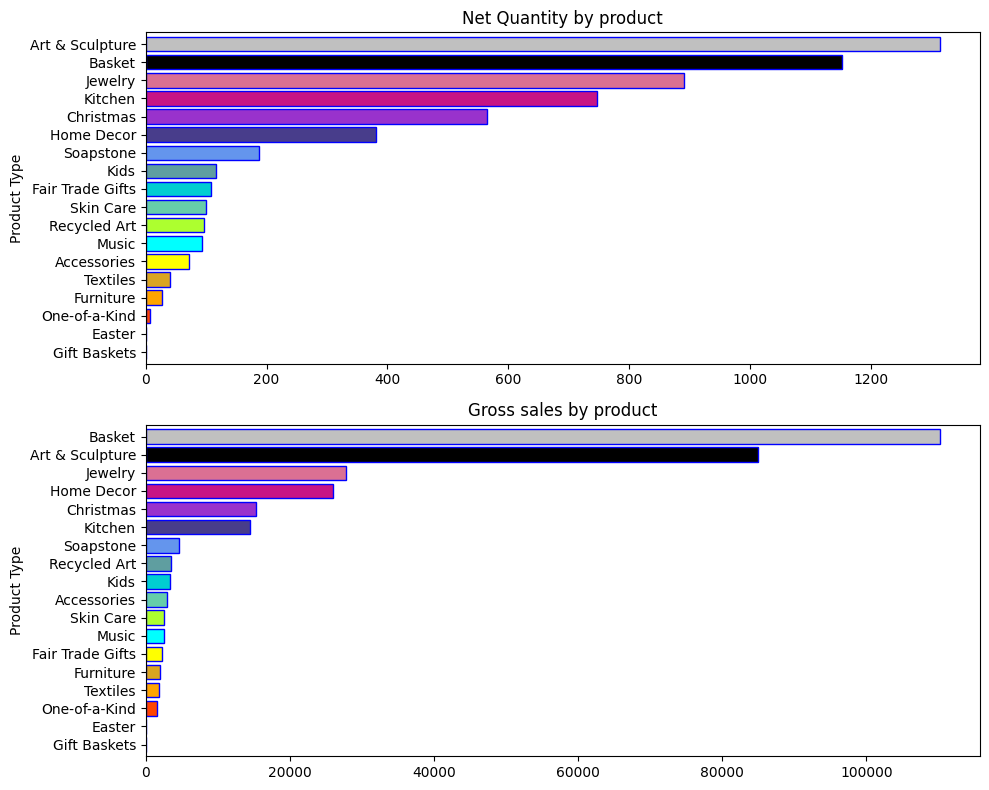

In [58]:
fig,axs=plt.subplots(2,1,figsize=(10,8)) #To create two plots together we use plt.subplots(2,1) #fig represents fig that will be created

df.groupby('Product Type')['Net Quantity'].sum().sort_values().plot(kind='barh',width=0.8,title='Net Quantity by product',edgecolor='blue',color=['deeppink','darkmagenta','orangered','orange','goldenrod','yellow','cyan','greenyellow','mediumaquamarine','darkturquoise','cadetblue','cornflowerblue','darkslateblue','darkorchid','mediumvioletred','palevioletred','k','silver','rosybrown','lightcoral'],ax=axs[0])
#ax=axs[] is specifies the plots created by subplots #to sort values in order; sort_values()
df.groupby('Product Type')['Gross Sales'].sum().sort_values().plot(kind='barh',width=0.8,title='Gross sales by product',edgecolor='blue',color=['deeppink','darkmagenta','orangered','orange','goldenrod','yellow','cyan','greenyellow','mediumaquamarine','darkturquoise','cadetblue','cornflowerblue','darkslateblue','darkorchid','mediumvioletred','palevioletred','k','silver','rosybrown','lightcoral'],ax=axs[1])
plt.tight_layout() #for proper spacing between two plots
plt.show() #for showing the plot